# Investigación Corta 2 

## Aprendizaje supervisado

Se explorará los métodos de aprendizaje supervizado descritos a continuación, a la vez que se analizará la variación de algunos hiper-parámetros que generen modelos de mayor precisión:

Regresión Logística, KNN, Regresión Lineal, Clasificador con Máquinas Vectoriales de Soporte, Clasificador Pasivo Agresivo y un método de ensamble que se describirá en su respectiva sección

Para ejemplificar el uso de los métodos de aprendizaje, se utilizará el conjunto de datos de dos dimensiones "heart-disease-uci", el cual describe varios atributos físicos y cardiovasculares de pacientes en distintos rangos etarios, así como la presencia de algún padecimiento cardíaco (https://www.kaggle.com/ronitf/heart-disease-uci).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv', delimiter = ',')

Aleatorizamos el conjunto de datos, para reducir la posibilidad de un sesgo en la elección de segmentos de training y test. Para ello, indicamos a la función *sample* que la proporción de la muestra sea de 1, con lo que ha de retornar todas las filas, en orden aleatorio.
Se reestablece los índices, a la vez que se indica *no* almacenar los índices antiguos.

In [2]:
df = df.sample(frac=1).reset_index(drop=True)

Creamos los conjuntos de pruebas y entrenamiento

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, df.target, test_size=0.33)

### Regresión Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para este método, exploraremos los hiper-parámetros *solver* y *max_iter*, que determinan, respectivamente, el algorimto a utilizar para la optimización de parámetros, y la cantidad máxima de iteraciones a ejecutar para que converja cada algoritmo.

In [20]:
from sklearn.linear_model import LogisticRegression

# ignoramos los warning para evitar spam de los solver que no convergen con 
# la cantidad de iteraciones especificada
import warnings
warnings.filterwarnings("ignore")

LogRegs = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
rango = range(100, 1000, 20)

# diccionarios con el solver como llave(LogRegs). Almacenaremos los scores 
# obtenidos para cada parámetro max_iter, para cada solver
train_scores = {}
test_scores = {}

for lr_slv in LogRegs:
    train_scores[lr_slv] = [] # @J@ no se puede hacer append a una llave inexistente
    test_scores[lr_slv] = []
    for i in rango:
        clf = LogisticRegression(max_iter=i, class_weight=None, solver=lr_slv).fit(x_train, y_train)

        train_scores[lr_slv].append(clf.score(x_train, y_train)) # @J@
        test_scores[lr_slv].append(clf.score(x_test, y_test))

Ploteamos los resultados

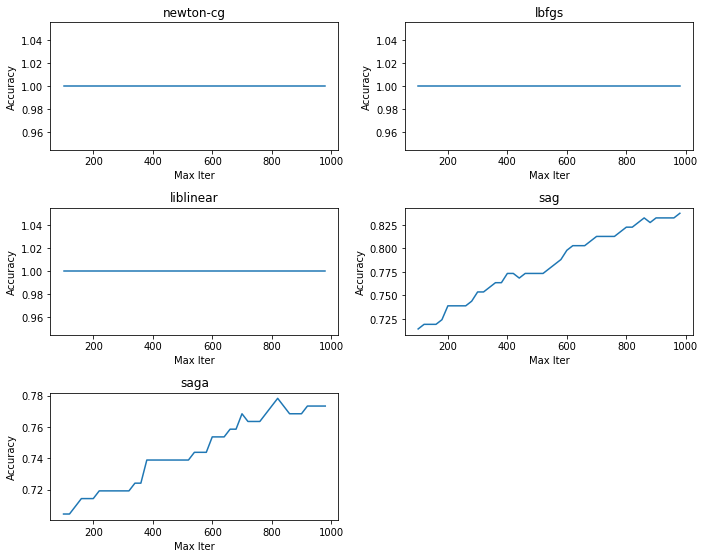

In [21]:
import matplotlib.pyplot as plt
#%matplotlib inline

layout = (4, 2)
plt.figure(figsize=(10, 10))

pl1 = plt.subplot2grid(layout, (0, 0))
pl2 = plt.subplot2grid(layout, (0, 1))
pl3 = plt.subplot2grid(layout, (1, 0))
pl4 = plt.subplot2grid(layout, (1, 1))
pl5 = plt.subplot2grid(layout, (2, 0))

for pl,n in [(pl1, 'newton-cg'),
             (pl2, 'lbfgs'),
             (pl3, 'liblinear'),
             (pl4, 'sag'),
             (pl5, 'saga')]:
    pl.plot(rango, train_scores[n])
    pl.set_title(n)
    pl.set_ylabel("Accuracy")
    pl.set_xlabel("Max Iter")
    
plt.tight_layout()

#test_scores
#train_scores

Se experimentó variando el parametro *C* el resultado fue exactamente igual para cada uno de sus valores

### KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

En el caso de KNN, variamos la cantidad de vecinos a utilizar, así como el método de cálculo de distancia entre puntos.

Además, se muestra cómo el normalizar los datos afecta de manera positiva los resultados de los modelos presentados.

In [6]:
from sklearn import preprocessing

# normalizamos los datos, indicamos al DataFrame de pandas que utilice las mismas columnas del set inicial
norm_Xtrain = pd.DataFrame(preprocessing.normalize(x_train), columns = x_train.columns)
norm_Xtest = pd.DataFrame(preprocessing.normalize(x_test), columns = x_train.columns)

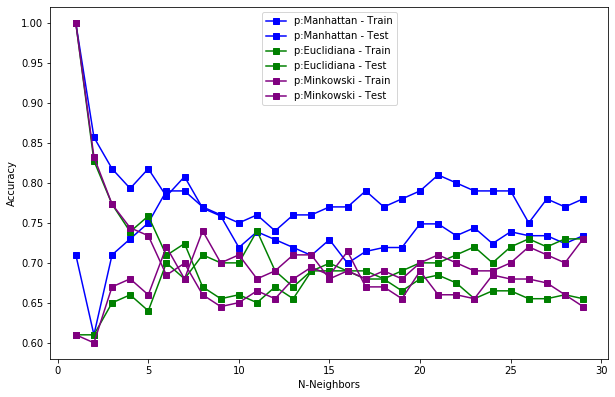

In [7]:
from sklearn.neighbors import KNeighborsClassifier

nneigh = range(1, 30)
PPP = [1, 2, 3]
pNames = ['', 'Manhattan', 'Euclidiana', 'Minkowski']
pColor = ['', 'blue', 'green', 'purple']

# diccionarios con el parámetro P como llave(PPP). Almacenaremos los scores 
# obtenidos para cada selecciön de cantidad de vecinos, para cada P
train_scores = {}
test_scores = {}

plt.figure(figsize=(10, 10))
knnPlot = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

for pp in PPP:
    train_scores[pp] = []
    test_scores[pp] = []
    for n in nneigh:
        clf = KNeighborsClassifier(n_neighbors=n, p=pp).fit(norm_Xtrain, y_train)

        train_scores[pp].append(clf.score(norm_Xtrain, y_train))
        test_scores[pp].append(clf.score(norm_Xtest, y_test))
    
    knnPlot.plot(nneigh, train_scores[pp], "s-", label="p:%s - Train" % pNames[pp], color = pColor[pp])
    knnPlot.plot(nneigh, test_scores[pp], "s-", label="p:%s - Test" % pNames[pp], color = pColor[pp])

knnPlot.set_ylabel("Accuracy")
knnPlot.set_xlabel("N-Neighbors")
knnPlot.legend(loc="upper center") ## o tambien "upper right, lower left..." para ubicar el cuadrito de legends

#train_scores

Se muestra acontinuación los resultados de un modelo creado sobre los datos originales, sin normalizar

<img src='imgs/knn_no_norm.JPG' style="width:50%; float:center">

Se experimentó variando los parámetros *algorithm* (ball_tree, kd_tree, brute), y *leaf_size*;  el resultado fue exactamente igual para toda variación, por lo que no se utilizaron para la demostración. Se presentan acontinuación capturas de ambos casos:

<img src='imgs/knn_leafSize_param.JPG' style="width:50%; float:left"/>
<img src='imgs/knn_algorithm_param.JPG' style="width:50%; float:right; margin:79px 0 0 0"/>

### Regresión Lineal

In [8]:
from sklearn.naive_bayes import GaussianNB

nbg = GaussianNB(var_smoothing=1e-10).fit(norm_Xtrain, y_train)

print("Training set score: {:.3f}".format(nbg.score(norm_Xtrain, y_train)))
print("Test set score: {:.3f}".format(nbg.score(norm_Xtest, y_test)))

Training set score: 1.000
Test set score: 1.000


In [9]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression().fit(norm_Xtrain, y_train)

print("Score para el set de entrenamiento: {:.3f}".format(lr.score(norm_Xtrain, y_train)))
print("Score para el set de pruebas: {:.3f}".format(lr.score(norm_Xtest, y_test)))

Score para el set de entrenamiento: 0.979
Score para el set de pruebas: 0.980


### SVC

Para este método es también necesario el normalizar los datos, de lo contrario, sin importar el kernel, las predicciones resultan muy sesgadas (score invariable de 1).

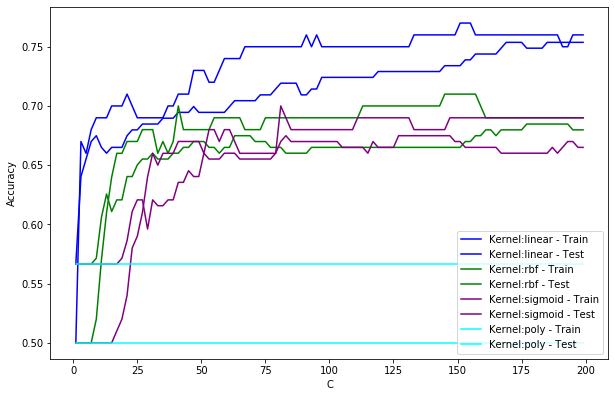

In [10]:
from sklearn.svm import SVC

# diccionarios con el kernel como llave(ker). Almacenaremos los scores 
# obtenidos para cada parámetro C, para cada kernel
train_scores = {}
test_scores = {}

ker = ['linear', 'rbf', 'sigmoid', 'poly']#, 'precomputed'] requiere de un kernel personalizado
kColor = ['blue', 'green', 'purple', 'cyan']
myC = range(1, 200, 2)

plt.figure(figsize=(10, 10))
svmPlot = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

kIdx = 0

for k in ker:
    train_scores[k] = []
    test_scores[k] = []
    for c in myC:
        clf = svc = SVC(kernel=k, C=c, cache_size=700).fit(norm_Xtrain, y_train)

        train_scores[k].append(clf.score(norm_Xtrain, y_train))
        test_scores[k].append(clf.score(norm_Xtest, y_test))
    
    svmPlot.plot(myC, train_scores[k], label="Kernel:%s - Train" % k, color=kColor[kIdx])
    svmPlot.plot(myC, test_scores[k], label="Kernel:%s - Test" % k, color=kColor[kIdx])
    kIdx+=1

svmPlot.set_ylabel("Accuracy")
svmPlot.set_xlabel("C")
svmPlot.legend()
svmPlot.legend(loc="lower right")

#train_scores

### Árboles Extremadamente Aleatorios

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier

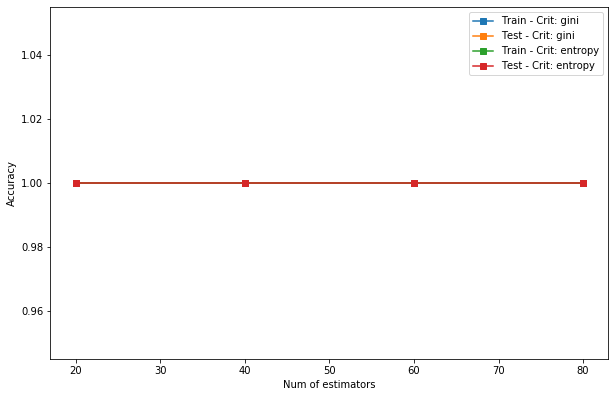

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

# diccionarios con el criterio como llave(crit). Almacenaremos los scores 
# obtenidos por cada n[umero de estimadores, para cada criterio
train_scores = {}
test_scores = {}

n_est = range(20, 100, 20)
crit = ['gini', 'entropy']

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

for msp in crit:
    train_scores[msp] = []
    test_scores[msp] = []
    for ne in n_est:
        clf = ExtraTreesClassifier(random_state=0, n_estimators=ne, criterion=msp).fit(norm_Xtrain, y_train)

        train_scores[msp].append(clf.score(norm_Xtrain, y_train))
        test_scores[msp].append(clf.score(norm_Xtest, y_test))
    
    ax1.plot(n_est, train_scores[msp], "s-", label="Train - Crit: %s" % msp)
    ax1.plot(n_est, test_scores[msp], "s-", label="Test - Crit: %s" % msp)


ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Num of estimators")
ax1.legend()

#ax1.legend(loc="lower right") ## o tambien "upper center"

#train_scores

### Clasificador Pasivo Agresivo

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier

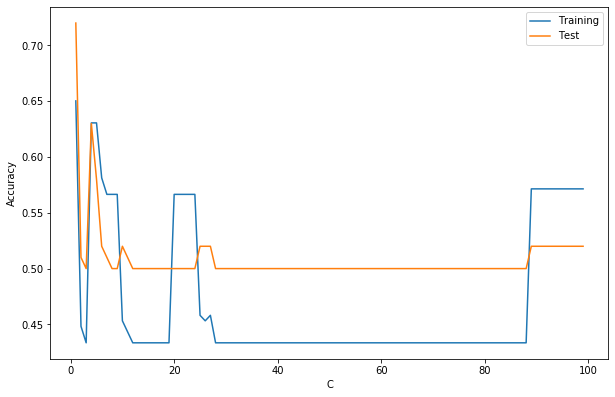

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier

train_scores = []
test_scores = []

myC = range(1, 100)

plt.figure(figsize=(10, 10))
pacPlot = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

for c in myC:    
    clf = PassiveAggressiveClassifier(random_state=0, C=c).fit(norm_Xtrain, y_train)
    train_scores.append(clf.score(norm_Xtrain, y_train))
    test_scores.append(clf.score(norm_Xtest, y_test))

pacPlot.plot(myC, train_scores, label="Training")
pacPlot.plot(myC, test_scores, label="Test")

pacPlot.set_ylabel("Accuracy")
pacPlot.set_xlabel("C")
pacPlot.legend()

#print("C: {} - Score Training Set: {:.3f}".format(c, clf.score(norm_Xtrain, y_train)))
#print("        Score Testing  Set: {:.3f}".format(clf.score(norm_Xtest, y_test)))



### Método de Ensamble: VotingClassifier

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(max_iter=900, class_weight=None, solver='sag')
clf2 = SVC(kernel='linear', C=175, cache_size=700)
clf3 = KNeighborsClassifier(n_neighbors=6, p=1) #Manhattan

eclf = VotingClassifier(estimators=[('lr', clf1), ('ksvc', clf2), ('knn', clf3)], voting='hard')

print("---------------Original data set---------------")
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'kSVC', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, norm_Xtrain, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

print("------------------Normalized-------------------")

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'kSVC', 'KNN', 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

---------------Original data set---------------
Accuracy: 0.60 (+/- 0.04) [Logistic Regression]
Accuracy: 0.72 (+/- 0.07) [kSVC]
Accuracy: 0.65 (+/- 0.10) [KNN]
Accuracy: 0.70 (+/- 0.07) [Ensemble]
------------------Normalized-------------------
Accuracy: 0.80 (+/- 0.07) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [kSVC]
Accuracy: 0.70 (+/- 0.05) [KNN]
Accuracy: 0.85 (+/- 0.08) [Ensemble]


# Fuentes consultadas

https://seaborn.pydata.org/tutorial/distributions.html

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

https://www.programcreek.com/python/example/102373/matplotlib.pyplot.subplot2grid

Documentación de scikit learn para cada método utilizado